## Imports

In [1]:
import sys
sys.path.append("..")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from src.data_loader import load_ravdess_data
from src.preprocessing import AudioPreprocessor, get_class_distribution
from src.config import PROCESSED_PATH

## Load dataset

In [2]:
df = load_ravdess_data()

Loaded 2880 audio files

Emotion distribution:
emotion
calm         384
happy        384
sad          384
angry        384
disgust      384
fear         384
surprised    384
neutral      192
Name: count, dtype: int64


## Initialize preprocessor

In [3]:
preprocessor = AudioPreprocessor()
processed_data = preprocessor.process_and_save(df, output_prefix="ravdess")

AUDIO PREPROCESSING PIPELINE:

[1/5] Extracting features from audio files...

Successfully extractedd features from 2880 files
Failed to process 0 files
Feature dimension: 382

[2/5] Encoding labels...
Label classes: [np.str_('angry'), np.str_('calm'), np.str_('disgust'), np.str_('fear'), np.str_('happy'), np.str_('neutral'), np.str_('sad'), np.str_('surprised')]
Label distribution: [384 384 384 384 384 192 384 384]

[3/5] Splitting data into train/test sets...
Training set size: 2304
Test set size: 576

[4/5] Normalizing features...
Feature normalization complete

[5/5] Saving processed data...
Processed data saved to: c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-recognition\data\processed\ravdess_processed.pkl
PREPROCESSING DONE


In [4]:
print(f"Training features shape: {processed_data['X_train'].shape}")
print(f"Test features shape: {processed_data['X_test'].shape}")
print(f"Training labels shape: {processed_data['y_train'].shape}")
print(f"Test labels shape: {processed_data['y_test'].shape}")
print(f"Feature dimension: {processed_data['feature_dim']}")
print(f"Number of classes: {len(processed_data['label_encoder'].classes_)}")
print(f"Classes: {list(processed_data['label_encoder'].classes_)}")

Training features shape: (2304, 382)
Test features shape: (576, 382)
Training labels shape: (2304,)
Test labels shape: (576,)
Feature dimension: 382
Number of classes: 8
Classes: [np.str_('angry'), np.str_('calm'), np.str_('disgust'), np.str_('fear'), np.str_('happy'), np.str_('neutral'), np.str_('sad'), np.str_('surprised')]


## Visualizations

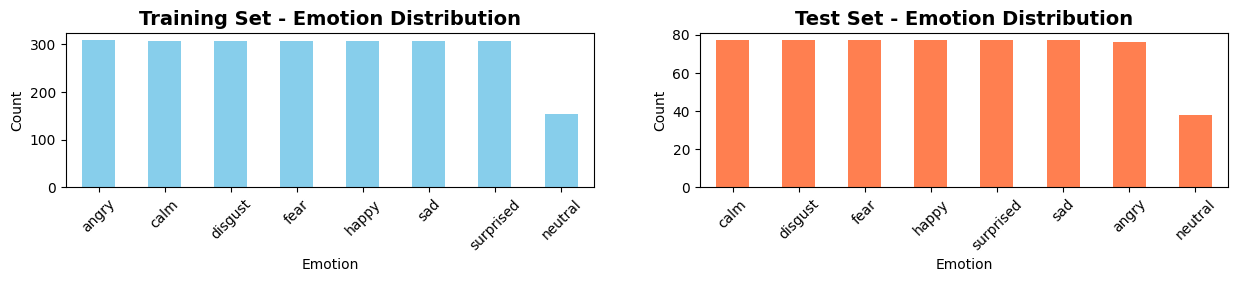


Training Set Distribution:
     Emotion  Count  Percentage
0      angry    308        0.35
1       calm    307        0.35
2    disgust    307        0.35
3       fear    307        0.35
4      happy    307        0.35
6        sad    307        0.35
7  surprised    307        0.35
5    neutral    154        0.35

Test Set Distribution:
     Emotion  Count  Percentage
1       calm     77        1.39
2    disgust     77        1.39
3       fear     77        1.39
4      happy     77        1.39
7  surprised     77        1.39
6        sad     77        1.39
0      angry     76        1.39
5    neutral     38        1.39


In [8]:
fig, axes = plt.subplots(1, 2, figsize=(15, 2))

# Training set distribution
train_dist = get_class_distribution(processed_data["y_train"], processed_data["label_encoder"])
train_dist.plot(x="Emotion", y="Count", kind="bar", ax=axes[0], color="skyblue", legend=False)
axes[0].set_title("Training Set - Emotion Distribution", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Emotion")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45)

# Test set distribution
test_dist = get_class_distribution(processed_data["y_test"], processed_data["label_encoder"])
test_dist.plot(x="Emotion", y="Count", kind="bar", ax=axes[1], color="coral", legend=False)
axes[1].set_title("Test Set - Emotion Distribution", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Emotion")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis='x', rotation=45)

plt.savefig("../results/plots/class_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

print("\nTraining Set Distribution:")
print(train_dist)
print("\nTest Set Distribution:")
print(test_dist)

# Before And After Normalization

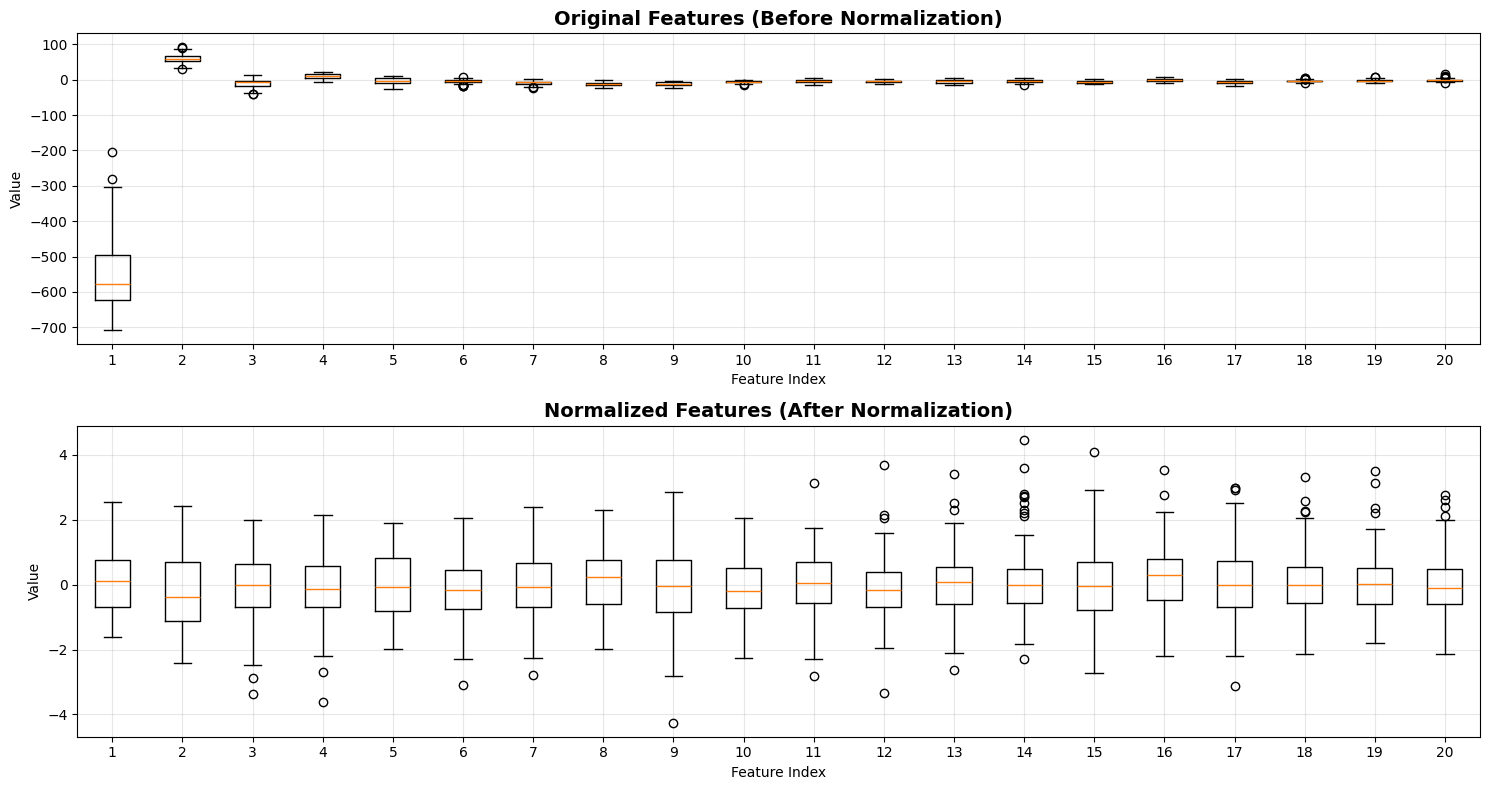

In [9]:
# Get original features (before normalization)
from src.feature_extraction import extract_all_features
from src.data_loader import load_audio_file

sample_size = 100
sample_features = []

for idx, row in df.head(sample_size).iterrows():
    audio = load_audio_file(row['file_path'])
    if audio is not None:
        features = extract_all_features(audio)
        sample_features.append(features)

original_features = np.array(sample_features)

# Compare with normalized features
n_dims = 20
fig, axes = plt.subplots(2, 1, figsize=(15, 8))

# Original features (first n_dims dimensions)
axes[0].boxplot(original_features[:, :n_dims])
axes[0].set_title('Original Features (Before Normalization)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Feature Index')
axes[0].set_ylabel('Value')
axes[0].grid(True, alpha=0.3)

# Normalized features (first 20 dimensions)
axes[1].boxplot(processed_data['X_train'][:100, :n_dims])
axes[1].set_title('Normalized Features (After Normalization)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Feature Index')
axes[1].set_ylabel('Value')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/plots/normalization_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
# Feature statistics
n_features = 10
print("\nTraining Set (Normalized):")
print(pd.DataFrame(processed_data["X_train"][:, :n_features]).describe())

print("\nTest Set (Normalized):")
print(pd.DataFrame(processed_data["X_test"][:, n_features]).describe())


Training Set (Normalized):
                  0             1             2             3             4  \
count  2.304000e+03  2.304000e+03  2.304000e+03  2.304000e+03  2.304000e+03   
mean  -2.374644e-16 -1.742433e-16  1.541976e-18  8.789266e-17 -5.396917e-18   
std    1.000217e+00  1.000217e+00  1.000217e+00  1.000217e+00  1.000217e+00   
min   -2.429161e+00 -3.506829e+00 -3.706820e+00 -3.963178e+00 -3.262067e+00   
25%   -7.436083e-01 -6.493278e-01 -5.850386e-01 -6.616455e-01 -7.263512e-01   
50%   -6.832358e-02  4.012917e-02  6.123727e-02  2.862336e-02  3.894825e-02   
75%    6.340623e-01  6.989532e-01  7.078201e-01  6.598319e-01  7.596594e-01   
max    3.219017e+00  2.867863e+00  2.449500e+00  2.999992e+00  2.449005e+00   

                  5             6             7             8             9  
count  2.304000e+03  2.304000e+03  2.304000e+03  2.304000e+03  2.304000e+03  
mean  -4.934325e-17  5.705313e-17 -9.830100e-17  3.392348e-17 -2.775558e-17  
std    1.000217e+00  1.000

In [11]:
# Load processed data
loaded_data = preprocessor.load_processed_data("ravdess_processed.pkl")

# Verify data integrity
assert np.array_equal(loaded_data["X_train"], processed_data["X_train"])
assert np.array_equal(loaded_data["y_train"], processed_data["y_train"])

Loaded processed data from: c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-recognition\data\processed\ravdess_processed.pkl
Training samples: 2304
Test samples: 576
Feature dimension: 382
